### Dataset Visualizations

Dataset used: [Wine Quality dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

##### Features:
* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol
* Wine Quality, score between 0 and 10 (Ground Truth)

In [1]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Read data from file
white_wine = pd.read_csv("../data/wine/winequality-white.csv", sep=';') 
red_wine = pd.read_csv("../data/wine/winequality-red.csv", sep=';') 
wine = pd.concat([red_wine,white_wine])

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Dataset Exploration:

(0, 12)

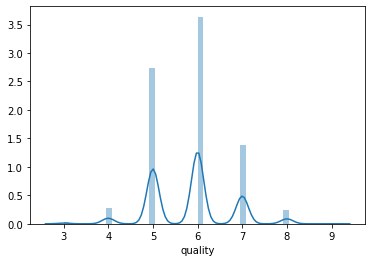

In [3]:
# distribution of target attribute "quality"
sns.distplot(wine.quality) # kde=0 if kernel density estimation is not necessary

# Scatterplot-Matrix visualises correlation of every possible combination of attributes, 
# especially the correlation of the input attributes and the target attribute quality is of importance
# sns.pairplot(wine)

# heatmap visualises the correlation of each pair of values
# sns.heatmap(wine.corr())

null_wine = wine[wine.isnull().values.any(axis=1)]
null_wine.shape

#### Modeling:
Regressionstechniken: Linear, Polynomial, knn, Regression

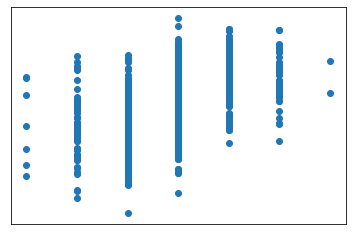

In [6]:
######### Linear Regression #########

train, test = train_test_split(wine, test_size=0.2)

# Training Model
x_train = train.drop('quality', axis=1)
y_train = train['quality']

model = LinearRegression()
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('quality', axis=1)
y_test = test['quality']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()

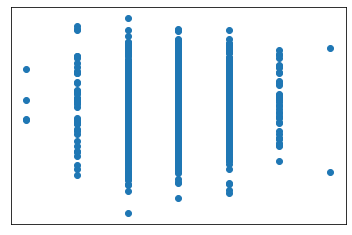

In [7]:
######### Polynomial Regression #########

train, test = train_test_split(wine, test_size=0.2)

# Training Model
x_train = train.drop('quality', axis=1)
y_train = train['quality']

model = PolynomialFeatures(degree = 2)
X_poly = model.fit_transform(x_train) 
  
model.fit(X_poly, y_train) 

# Testing
x_test = test.drop('quality', axis=1)
y_test = test['quality']
#y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()

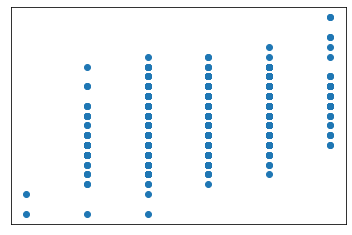

In [9]:
######### knn Regression #########

train, test = train_test_split(wine, test_size=0.2)
n_neighbors = 5

# Training Model
x_train = train.drop('quality', axis=1)
y_train = train['quality']

model = neighbors.KNeighborsRegressor(n_neighbors)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('quality', axis=1)
y_test = test['quality']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()

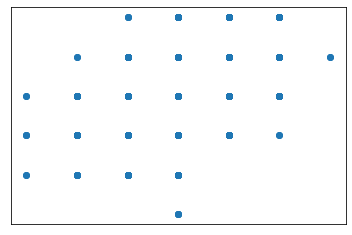

In [10]:
######### Regression Trees #########

train, test = train_test_split(wine, test_size=0.2)

# Training Model
x_train = train.drop('quality', axis=1)
y_train = train['quality']

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('quality', axis=1)
y_test = test['quality']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()